# Comparative analysis of **ANN** & **LeNet-5** on **MNIST** dataset. 

- **Name - Rishi Sharma**
- **RollNo - 171CO135**

In this notebook we will discuss the implementation of traditional **Artificial Neural Network(ANN)** & **Lenet-5**(a convolutional based Neural Network). Then we will compare their performance based on the **Accuracy**, **Precision** & **Recall** of two models.

# Artifical Neural Networks(ANN)
An **Artificial Neural Network (ANN)** is a computer system inspired by biological neural networks for creating artificial brains based on the collection of connected units called artificial neurons. It is designed to analyse and process information as humans. Artificial Neural Network has self-learning capabilities to produce better results as more data is available.

An **Artificial Neural Network (ANN)** is composed of four principal objects:
- **Layers**: all the learning occurs in the layers. There are 3 layers 
    1. Input 
    2. Hidden 
    3. Output
- **Feature & Label**: Input data to the network (features) and output from the network (labels)
- **Loss function**: Metric used to estimate the performance of the learning phase
- **Optimizer**: Improve the learning by updating the knowledge in the network

A neural network will take the input data and push them into an ensemble of layers. The network needs to evaluate its performance with a loss function. The loss function gives to the network an idea of the path it needs to take before it masters the knowledge. The network needs to improve its knowledge with the help of an optimizer. Here is an image of various layers and neurons with their connections.

<center><img src="5.png" width="700px"></center>

We will be performing the experiment on **MNIST** dataset.

## MNIST
The **MNIST** database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.It consists of the black and white images from **NIST** which were normalized to fit into a **28x28** pixel bounding box and anti-aliased, which introduced grayscale levels. The **MNIST** database contains **60,000** training images and **10,000** testing images. Half of the training set and half of the test set were taken from **NIST's** training dataset, while the other half of the training set and the other half of the test set were taken from **NIST's** testing dataset. The original creators of the database keep a list of some of the methods tested on it. Let's have a look at an example from the dataset. Below is the grayscale image of digit **8** from the dataset.

<center><img src="2.png" width="300px" height="200px"></center>

Below is the frequency of number of image of each digit in the MNIST data.

<center><img src="4.png" width="600px"></center>


Now, we load the **MNIST** dataset using the **Keras** library. The **Keras** library has a suite of datasets readily available for use with easy accessibility. We are also required to partition the dataset into **testing**, **validation** & **training**. Here are some quick descriptions of each partition category.

- Training Dataset: This is the group of our dataset used to train the neural network directly. Training data refers to the dataset partition exposed to the neural network during training.
- Validation Dataset: This group of the dataset is utilized during training to assess the performance of the network at various iterations.
- Test Dataset: This partition of the dataset evaluates the performance of our network after the completion of the training phase.

It is also required that the pixel intensity of the images within the dataset are normalized from the value range **0–255 to 0–1**.

# Let's move on to the implementation part

## ANN implementation on MNIST dataset

## Importing the libraries

In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

## Loading the MNIST dataset & separating them into train & test set

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Checking the shape of train & test set

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Reshaping the train & test set

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_val = X_train[:5000]
y_val = y_train[:5000]

## Normalizing the dataset

In [5]:
#feature scaling
minmax = MinMaxScaler()

#fit and transform training dataset
X_train = minmax.fit_transform(X_train)

#transform testing dataset
X_test = minmax.transform(X_test)

print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


## Data Visualization
Generally, it is important to understand the data before building a model. Hence, visualizing the data is one of the best approaches to uncover any pattern within the features by using **scatter**, **boxplot**, **violinplot** and so on. In our case, we can visualize the images to see how the images can distinguish from one another.

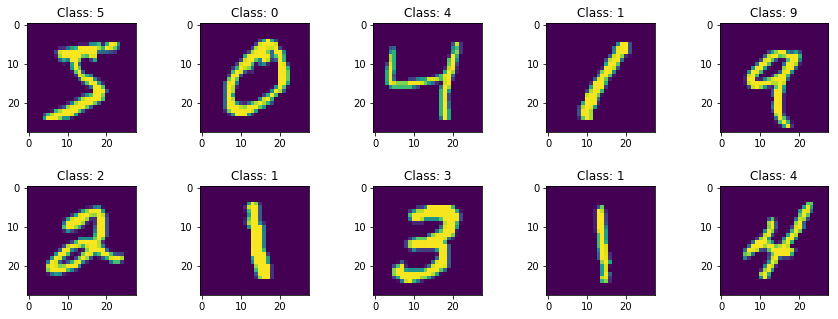

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i])
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

## Building an ANN model with 2 Dense Layer

In [6]:
#initializing CNN model
ann_model = Sequential()

#adding 1st hidden layer
ann_model.add(Dense(input_dim = 784, units = 256, kernel_initializer='uniform', activation='relu'))

#adding 2nd hidden layer
ann_model.add(Dense(64, activation='relu'))

#adding output layer
ann_model.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

- The **Sequential** class: Sequential groups a linear stack of layers into a **tf.keras.Model**.
- The **add()** method: Adds a layer instance on top of the layer stack.
- The **Dense** class: It adds the hidden layer in our network.
- The **compile()** method: Configures the model for training.
- The **summary()** method: Prints a string summary of the network.

## Summary of ANN Model

In [7]:
#model summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [8]:
#compile the neural network
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## Training ANN Model

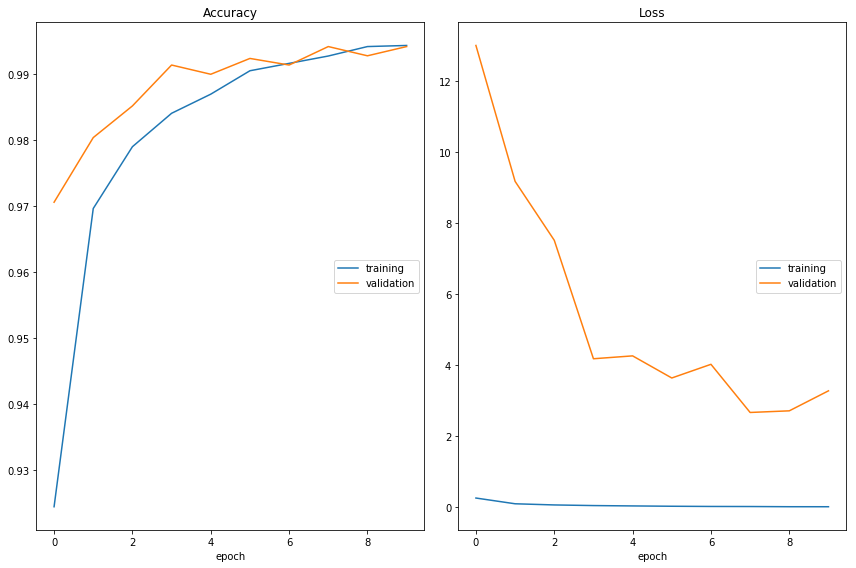

Accuracy
	training         	 (min:    0.924, max:    0.994, cur:    0.994)
	validation       	 (min:    0.971, max:    0.994, cur:    0.994)
Loss
	training         	 (min:    0.016, max:    0.261, cur:    0.016)
	validation       	 (min:    2.669, max:   12.998, cur:    3.278)
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161 - acc: 0.9944 - val_loss: 3.2783 - val_acc: 0.9942


In [9]:
from livelossplot import PlotLossesKeras
ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[PlotLossesKeras()])

## Calculating the Accuracy, Precision, Recall & F1-Score of ANN Model

In [10]:
ann_model.evaluate(X_test, y_test, verbose=0)[1]

0.9765999913215637

In [11]:
y_pred = ann_model.predict(X_test,  verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

313/313 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.96      0.99      0.97       982
           5       0.98      0.97      0.98       892
           6       1.00      0.96      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**LeNet** was introduced in the research paper*Gradient-Based Learning Applied To Document Recognition* in the year **1998** by **Yann LeCun**, **Leon Bottou**, **Yoshua Bengio**, & **Patrick Haffner**. Many of the listed authors of the paper have gone on to provide several significant academic contributions to the field of deep learning.

## Convolutional Neural Networks(CNN)
**Convolutional Neural Networks** is the standard form of neural network architecture for solving tasks associated with images. Solutions for tasks such as **object detection**, **face detection**, **pose estimation** and more all have CNN architecture variants. A few characteristics of the CNN architecture makes them more favourable in several computer vision tasks. There are some characteristics which make CNN perform better than ANNs. There are:
 - Local Receptive Fields
 - Sub-Sampling
 - Weight Sharing

## LeNet-5
**LeNet-5** CNN architecture is made up of **7** layers. The layer composition consists of **3 convolutional layers**, **2 subsampling layers** & **2 fully connected layers**.

<img src="1.png" width="1200px" height="300px">

The diagram above shows a depiction of the **LeNet-5** architecture, as illustrated in the original paper. The proposed model structure of **LeNet-5** has **7** layers, excluding input layers. The details of each layer are as follows:

- *Layer C1* is the first Conv-layer with **6** feature maps with strides of **1**. Using a formula given in the appendix, one can calculate the output dimension of this layer **28×28** with **156** trainable parameters. Activation function of this layer is **tanh**.
- *Layer S2* is an average pooling layer. This layer maps average values from the previous Conv layer to the next Conv layer. The Pooling layer is used to reduce the dependence of the model on the location of the features rather than the shape of the features. The pooling layer in LeNet model has a size of **2** and strides of **2**.
- *Layer C3* is the second set of the convolutional layer with **16** feature maps. The output dimension of this layer is **10** with **2,416** parameters. Activation function of this layer is **tanh**.
- *Layer S4* is another average pooling layer with dimension of **2** and stride size of **2**. The next layer is responsible for flattening the output of the previous layer into one dimensional array. The output dimension of this layer is **400 (5×5×16)**.
- *Layer C5* is a dense block (fully connected layer) with **120** connections and **48,120** parameters **(400×120)**. Activation function of this layer is **tanh**.
- *Layer F6* is another dense block with **84** parameters and **10,164** parameters **(84×120+84)**. Activation function of this layer is **tanh**.
- *Output Layer* has **10** dimension (equals number of classes in the database) with v850** parameters **(10×84+10)**. Activation function of output layer is **sigmoid**.

The first layer is the input layer — this is generally not considered a layer of the network as nothing is learnt in this layer. The input layer is built to take in **32x32**, and these are the dimensions of images that are passed into the next layer. Those who are familiar with the **MNIST** dataset will be aware that the **MNIST** dataset images have the dimensions **28x28**. To get the **MNIST** images dimension to the meet the requirements of the input layer, the **28x28** images are padded.

The grayscale images used in the research paper had their pixel values normalized from **0 to 255**, to values between **-0.1 & 1.175**. The reason for normalization is to ensure that the batch of images have a mean of **0** and a standard deviation of **1**, the benefits of this is seen in the reduction in the amount of training time. In the image classification with **LeNet-5**, we'll be normalizing the pixel values of the images to take on values between **0 to 1** so that value will be centerd around **0**.
 
The **LeNet-5** architecture utilizes two significant types of layer construct: convolutional layers and subsampling layers.
 - Convolutional layers
 - Sub-sampling layers

Within the research paper, convolutional layers are identified with the *Cx*, and subsampling layers are identified with *Sx*, where *x* is the sequential position of the layer within the architecture. *Fx* is used to identify fully connected layers.

The official first layer convolutional layer *C1* produces as output **6** feature maps, and has a kernel size of **5x5**. The kernel/filter is the name given to the window that contains the weight values that are utilized during the convolution of the weight values with the input values. **5x5** is also indicative of the local receptive field size each unit or neuron within a convolutional layer. The dimensions of the six feature maps the first convolution layer produces are **28x28**.

A subsampling layer *S2* follows the *C1* layer. The *S2* layer halves the dimension of the feature maps it receives from the previous layer; this is known commonly as downsampling.
The *S2* layer also produces **6** feature maps, each one corresponding to the feature maps passed as input from the previous layer. 




# Let's move on to the implementation part

## LeNet-5 TensorFlow Implementation

## Importing the required libraries

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

We will be performing the experiment on **MNIST** dataset.

## Loading the MNIST dataset & separating them into train & test set

In [13]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

## Checking the shape of train & test set

In [14]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


## Creating the Lenet-5 Architecture

In [15]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

We first assign the variable *lenet_5_model* to an instance of the **tf.keras.Sequential** class constructor. Within the class constructor, we then proceed to define the layers within our model. The *C1* layer is defined by the line **keras.layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=train_x[0].shape, padding='same')**. We are using the **tf.keras.layers.Conv2D** class to construct the convolutional layers within the network.

## Activation Function
A mathematical operation that transforms the result or signals of neurons into a normalized output. An activation function is a component of a neural network that introduces non-linearity within the network. The inclusion of the activation function enables the neural network to have greater representational power and solve complex functions. In **Lenet-5** architecutre they used **tanh** activation function. Below is image of **Tanh** activation.

<center><img src="3.png" width="400px" height="300px"></center>


The rest of the convolutional layers follow the same layer definition as *C1* with some different values entered for the arguments. In the original paper where the **LeNet-5** architecture was introduced, subsampling layers were utilized. Within the subsampling layer the average of the pixel values that fall within the **2x2** pooling window was taken, after that, the value is multiplied with a coefficient value. A bias is added to the final result, and all this is done before the values are passed through the activation function. But in our implemented **LeNet-5** neural network, we're utilizing the **tf.keras.layers.AveragePooling2D** constructor. We don't pass any arguments into the constructor as some default values for the required arguments are initialized when the constructor is called.  There are two more types of layers within the network, **the flatten layer** and **the dense layers**. The flatten layer is created with the class constructor **tf.keras.layers.Flatten**. The purpose of this layer is to transform its input to a 1-dimensional array that can be fed into the subsequent dense layers. The dense layers have a specified number of units or neurons within each layer, F6 has 84, while the output layer has ten units. The last dense layer has ten units that correspond to the number of classes that are within the MNIST dataset. The activation function for the output layer is a softmax activation function.

## Softmax
An activation function that is utilized to derive the probability distribution of a set of numbers within an input vector. The output of a softmax activation function is a vector in which its set of values represents the probability of an occurrence of a class/event. The values within the vector all add up to 1.



## Compiling & building the model

In [16]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

**Keras** provides the *compile* method through the model object we have instantiated earlier. The compile function enables the actual building of the model we have implemented behind the scene with some additional characteristics such as the **loss function**, **optimizer**, & **metrics**. To train the network, we utilize a loss function that calculates the difference between the predicted values provided by the network and actual values of the training data. The loss values accompanied by an optimization algorithm(**Adam**) facilitates the number of changes made to the weights within the network. Supporting factors such as **momentum** & **learning rate schedule**, provide the ideal environment to enable the network training to converge, herby getting the loss values as close to zero as possible. During training, we’ll also validate our model after every epoch with the valuation dataset partition created earlier.

## Summary of the model

In [17]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

## Fitting the model to the data while plotting the live accuracy graph

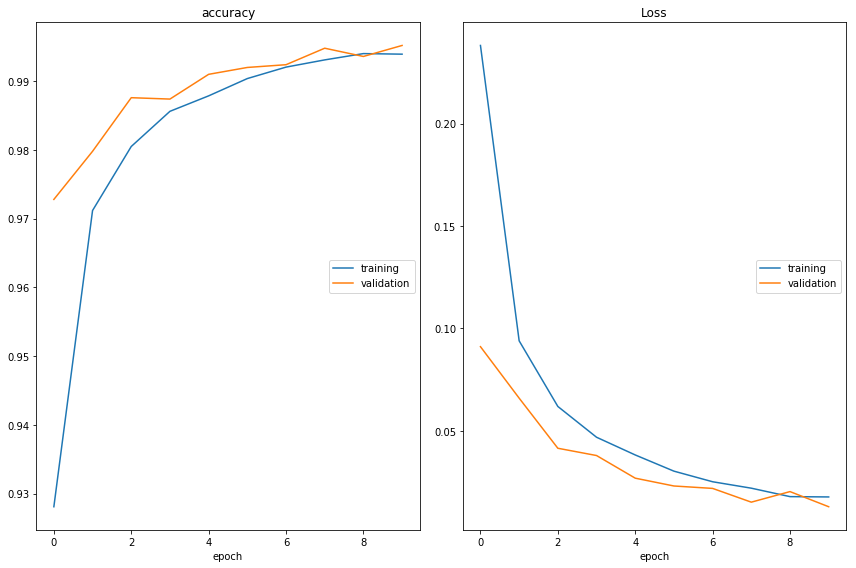

accuracy
	training         	 (min:    0.928, max:    0.994, cur:    0.994)
	validation       	 (min:    0.973, max:    0.995, cur:    0.995)
Loss
	training         	 (min:    0.018, max:    0.238, cur:    0.018)
	validation       	 (min:    0.013, max:    0.091, cur:    0.013)
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0130 - val_accuracy: 0.9952


In [18]:
from livelossplot import PlotLossesKeras
lenet_5_model.fit(train_x, train_y, epochs=10, validation_data=(val_x, val_y), callbacks=[PlotLossesKeras()])

## Calculating the Accuracy, Precision, Recall & F1 Score of Lenet-5

In [20]:
lenet_5_model.evaluate(test_x, test_y)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9853


0.9853000044822693

In [21]:
y_pred = lenet_5_model.predict(test_x,  verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_y, y_pred_bool))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Analysis of Lenet architecture

**LeNet-1** was trained on LeCun’s USPS dataset, whereas **LeNet-4** & **LeNet-5** were trained on the MNIST dataset. All LeNet variants were commonly trained using **Maximum Likelihood Estimation (MLE)** and **Mean Squared Error (MSE)** loss. The input images for LeNet were normalised such that their values remain within the range **[-0.1, 1.175]**, which made the mean **0** and the variance roughly **1**. It was argued that normalisation accelerated the network’s learning. While the LeNet CNNs marked a breakthrough for their time, there were several limitations:

1. The networks were **small** and therefore had limited applications where they worked correctly.
2. The networks only worked with **single-channel (black and white images)**, which also limited its applications.
3. Most modern adaptations of this model implement a **max-pooling operation** as opposed to an **average pooling** operation as it allows for more rapid convergence due to the larger gradients returned during back-propagation.
4. Most modern adaptations implement a **ReLu activation** as opposed to **tanh** and **sigmoid** as **ReLu** usually leads to higher classification accuracies.

## Summary of LeNet

To summarise, the following represent some key takeaways about the LeNet networks:
1. Operated with single-channel images, either **(28×28)** or **(32×32)** in size.
2. Used **tanh** activation functions as opposed to **ReLu**.
3. Used **average pooling** as opposed to **max pooling** for subsampling.
4. Used **(2×2)** kernels for average pooling subsampling.
5. Used **(5×5)** kernels for convolutions.
6. Trained by optimising for **Mean Squared Error (MSE) loss**.
7. Included **trainable coefficient** and **bias** for some subsampling operations.
8. Classified images into one of ten classes.